In [1]:
import os, sys, cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

M = np.array([[1, 0.2, 0],
             [0, 2, 0]], np.float32)

dst = cv2.warpAffine(src, M, (0, 0))
                                     # 이런 식으로 이미지를 확대할 수 있다.
dst_resize = cv2.resize(src, (0, 0), fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_resize', dst_resize)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
src = cv2.imread('../Ch_6_geometric_trans/fig/puppy.bmp')

rad = 30*np.pi/180

M = np.array([[np.cos(rad), np.sin(rad), 0],
             [-np.sin(rad), np.cos(rad), 0]], np.float32)

dst = cv2.warpAffine(src, M, (0, 0))

h, w = src.shape[:2]
cp = (w/2, h/2)
M_cp = cv2.getRotationMatrix2D(cp, 30, 1)

dst_cp = cv2.warpAffine(src, M_cp, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_cp', dst_cp)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
src = cv2.imread('../Ch_6_geometric_trans/fig/checkerboard.png')

h, w = src.shape[:2]

src_point = np.array([[217, 50], [691, 47], [830, 517] ,[67, 526]], np.float32)

dst_point = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

M = cv2.getPerspectiveTransform(src_point, dst_point)
dst = cv2.warpPerspective(src, M, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
src = cv2.imread('../Ch_5_filtering/fig/blue_eyes.png', 1)

kernel_3 = np.ones((3, 3), np.float32)/9
kernel_5 = np.ones((5, 5), np.float32)/25

dst_3 = cv2.filter2D(src, -1, kernel_3)
dst_5 = cv2.filter2D(src, -1, kernel_5)

dst3 = cv2.blur(src, (3, 3))
dst7 = cv2.blur(src, (7, 7))
dst11 = cv2.blur(src, (11, 11))

dst_Ga = cv2.GaussianBlur(src, (0, 0), 5)

dst_bil = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
# cv2.imshow('dst_3', dst_3)
# cv2.imshow('dst_5', dst_5)
# cv2.imshow('dst3', dst3)
cv2.imshow('dst7', dst7)
# cv2.imshow('dst11', dst11)
cv2.imshow('dst_Ga', dst_Ga)
cv2.imshow('dst_bil', dst_bil)


cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
## hist equal, norm

src = cv2.imread('../ch_4/spring_in_park.jpg',
                cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_equal = cv2.equalizeHist(v)
v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)

src_equal = cv2.merge((h, s, v_equal))
src_norm = cv2.merge((h, s, v_norm))

src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)
src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_equal', src_equal)
cv2.imshow('src_norm', src_norm)

cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('min', 'src')
    hmax = cv2.getTrackbarPos('max', 'src')
    
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

src = cv2.imread('../ch_4/palette_round.jpg')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('src', src)
cv2.createTrackbar('min', 'src', 50, 179, call_track)
cv2.createTrackbar('max', 'src', 80, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


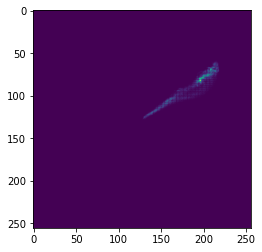

In [37]:
src = cv2.imread('../ch_4/green/green.png', cv2.IMREAD_REDUCED_COLOR_2)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x, y, w, h = cv2.selectROI(src)
crop = src_ycrcb[y:y+h, x:x+w]

ch = [1, 2]
ranges = [0, 256, 0, 256]

hist = cv2.calcHist([crop], ch, None, [256, 256], ranges)

backproj = cv2.calcBackProject([src_ycrcb], ch, hist, ranges, 1)

dst = cv2.copyTo(src, backproj)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)

plt.imshow(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
        
    cv2.imshow('frame', frame)
    out.write(frame)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
out.release()

cv2.destroyAllWindows()

In [40]:
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 50, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x, y

img = np.ones((500, 600, 3), np.uint8)*255

cv2.imshow('img', img)

cv2.setMouseCallback('img', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
img = cv2.imread('../ch_1/figure/cat.bmp')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE)
cv2.imshow('img', img)

while True:
    key = cv2.waitKey()
    
    if key == 27 or key == ord('q'):
        break
    
cv2.destroyAllWindows()